In [221]:
import pandas as pd
import numpy as np
import seaborn as sns


In [222]:
# Ingesting The data from CSV 
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [223]:
# Basic Statistics <== 0 values need to be replaced with NaN Values
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [224]:
#Replacing 0's in Glucose, BloodPressure, SkinThickness, BMI, Insulin columns
diabetes_data[['Glucose','BloodPressure','SkinThickness','BMI','Insulin',]] = diabetes_data[['Glucose','BloodPressure','SkinThickness','BMI','Insulin',]].replace(0.0, np.NaN)

In [225]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Text(0.5, 1.0, '% Nan')

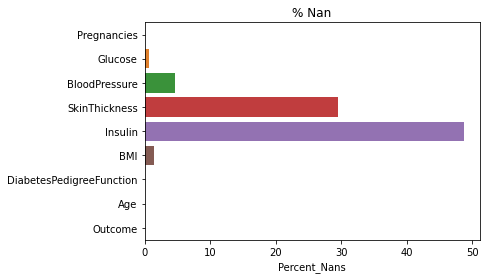

In [227]:
# inspecting the % of in each column
def pecent_NaN():
    NUll_data = pd.DataFrame(diabetes_data.isnull().sum(), columns=['NaNs'])
NUll_data['Count'] = 768
NUll_data['Percent_Nans'] = NUll_data['null']/ NUll_data['count']*100
columns= diabetes_data.columns

ax = sns.barplot(x ='Percent_Nans' , y= columns , data= NUll_data)
plt.title('% Nan')


In [231]:
# Plan = replace Nans with the mean values of their respective Outcome
mean_data = pd.DataFrame(diabetes_data.groupby('Outcome').mean(), columns= columns.drop('Outcome'))
mean_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.643863,70.877339,27.235457,130.287879,30.859674,0.429734,31.190000
1,4.865672,142.319549,75.321429,33.000000,206.846154,35.406767,0.550500,37.067164


In [ ]:
#Replaceing Nans

In [139]:
diabetes_data.loc[(diabetes_data['Outcome'] == 0 ) & (diabetes_data['Glucose'].isnull()), 'Glucose'] = 110
diabetes_data.loc[(diabetes_data['Outcome'] == 1 ) & (diabetes_data['Glucose'].isnull()), 'Glucose'] = 142
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [141]:
diabetes_data.loc[(diabetes_data['Outcome'] == 0 ) & (diabetes_data['BloodPressure'].isnull()), 'BloodPressure'] = 70
diabetes_data.loc[(diabetes_data['Outcome'] == 1 ) & (diabetes_data['BloodPressure'].isnull()), 'BloodPressure'] = 75
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [143]:
diabetes_data.loc[(diabetes_data['Outcome'] == 0 ) & (diabetes_data['SkinThickness'].isnull()), 'SkinThickness'] = 27
diabetes_data.loc[(diabetes_data['Outcome'] == 1 ) & (diabetes_data['SkinThickness'].isnull()), 'SkinThickness'] = 33
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [145]:
diabetes_data.loc[(diabetes_data['Outcome'] == 0 ) & (diabetes_data['Insulin'].isnull()), 'Insulin'] = 130
diabetes_data.loc[(diabetes_data['Outcome'] == 1 ) & (diabetes_data['Insulin'].isnull()), 'Insulin'] = 206
diabetes_data.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [146]:
diabetes_data.loc[(diabetes_data['Outcome'] == 0 ) & (diabetes_data['BMI'].isnull()), 'BMI'] = 30
diabetes_data.loc[(diabetes_data['Outcome'] == 1 ) & (diabetes_data['BMI'].isnull()), 'BMI'] = 35
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

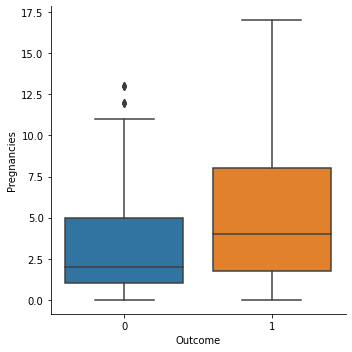

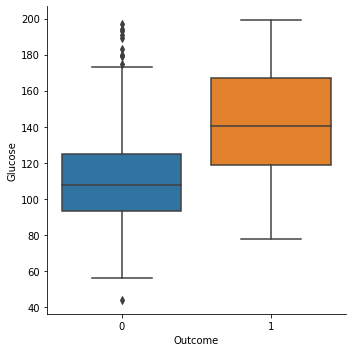

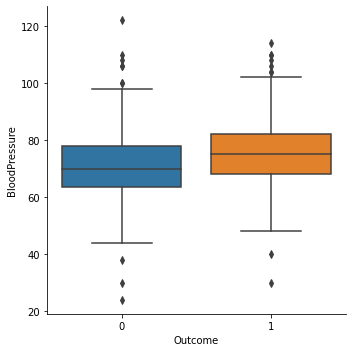

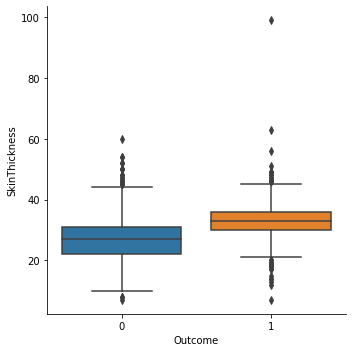

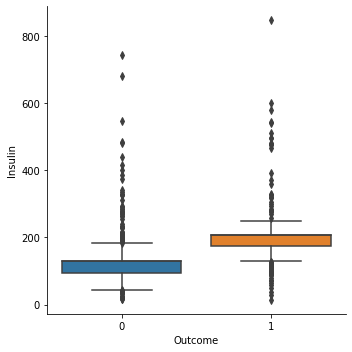

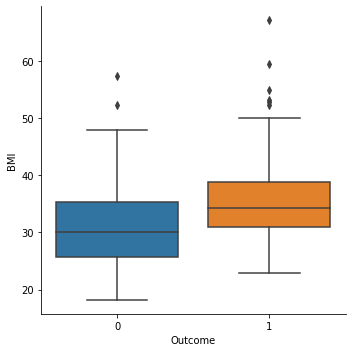

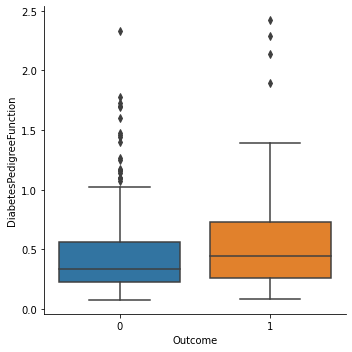

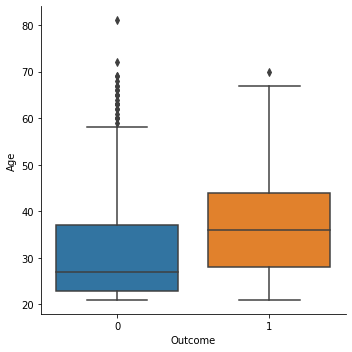

In [148]:
columns = list(diabetes_data.columns)
columns.remove('Outcome')

for i in columns:
    sns.catplot(x='Outcome', y= i , data=diabetes_data, kind='box')
    

In [ ]:
sns.catplot(x="size", y="total_bill", data=tips)

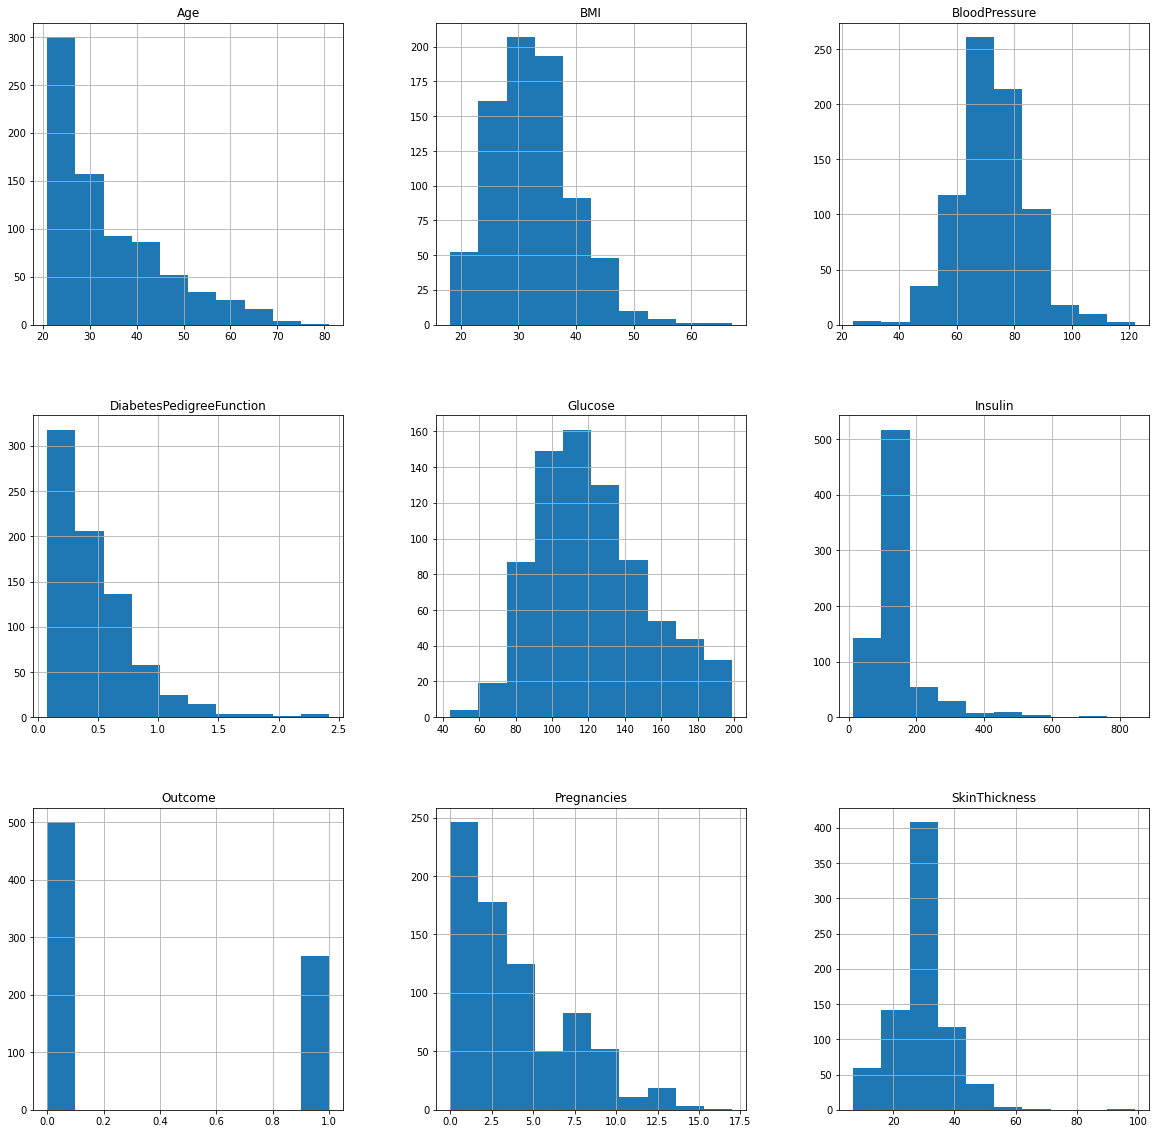

In [81]:
import matplotlib.pyplot as plt
p = diabetes_data.hist(figsize=(20,20))




In [156]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

0    500
1    268
Name: Outcome, dtype: int64


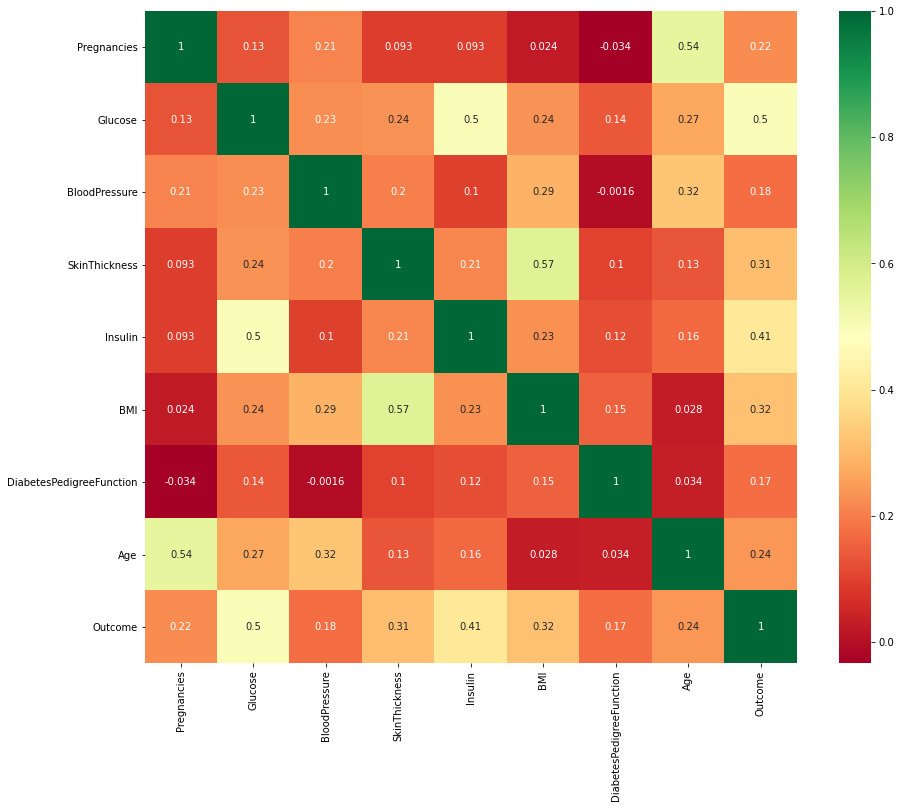

In [157]:
print(diabetes_data['Outcome'].value_counts())
plt.figure(figsize=(15,12)) 
sns.heatmap(diabetes_data.corr(), square=True,annot= True, cmap='RdYlGn')


C:\Users\effieklestz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\effieklestz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\effieklestz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\effieklestz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


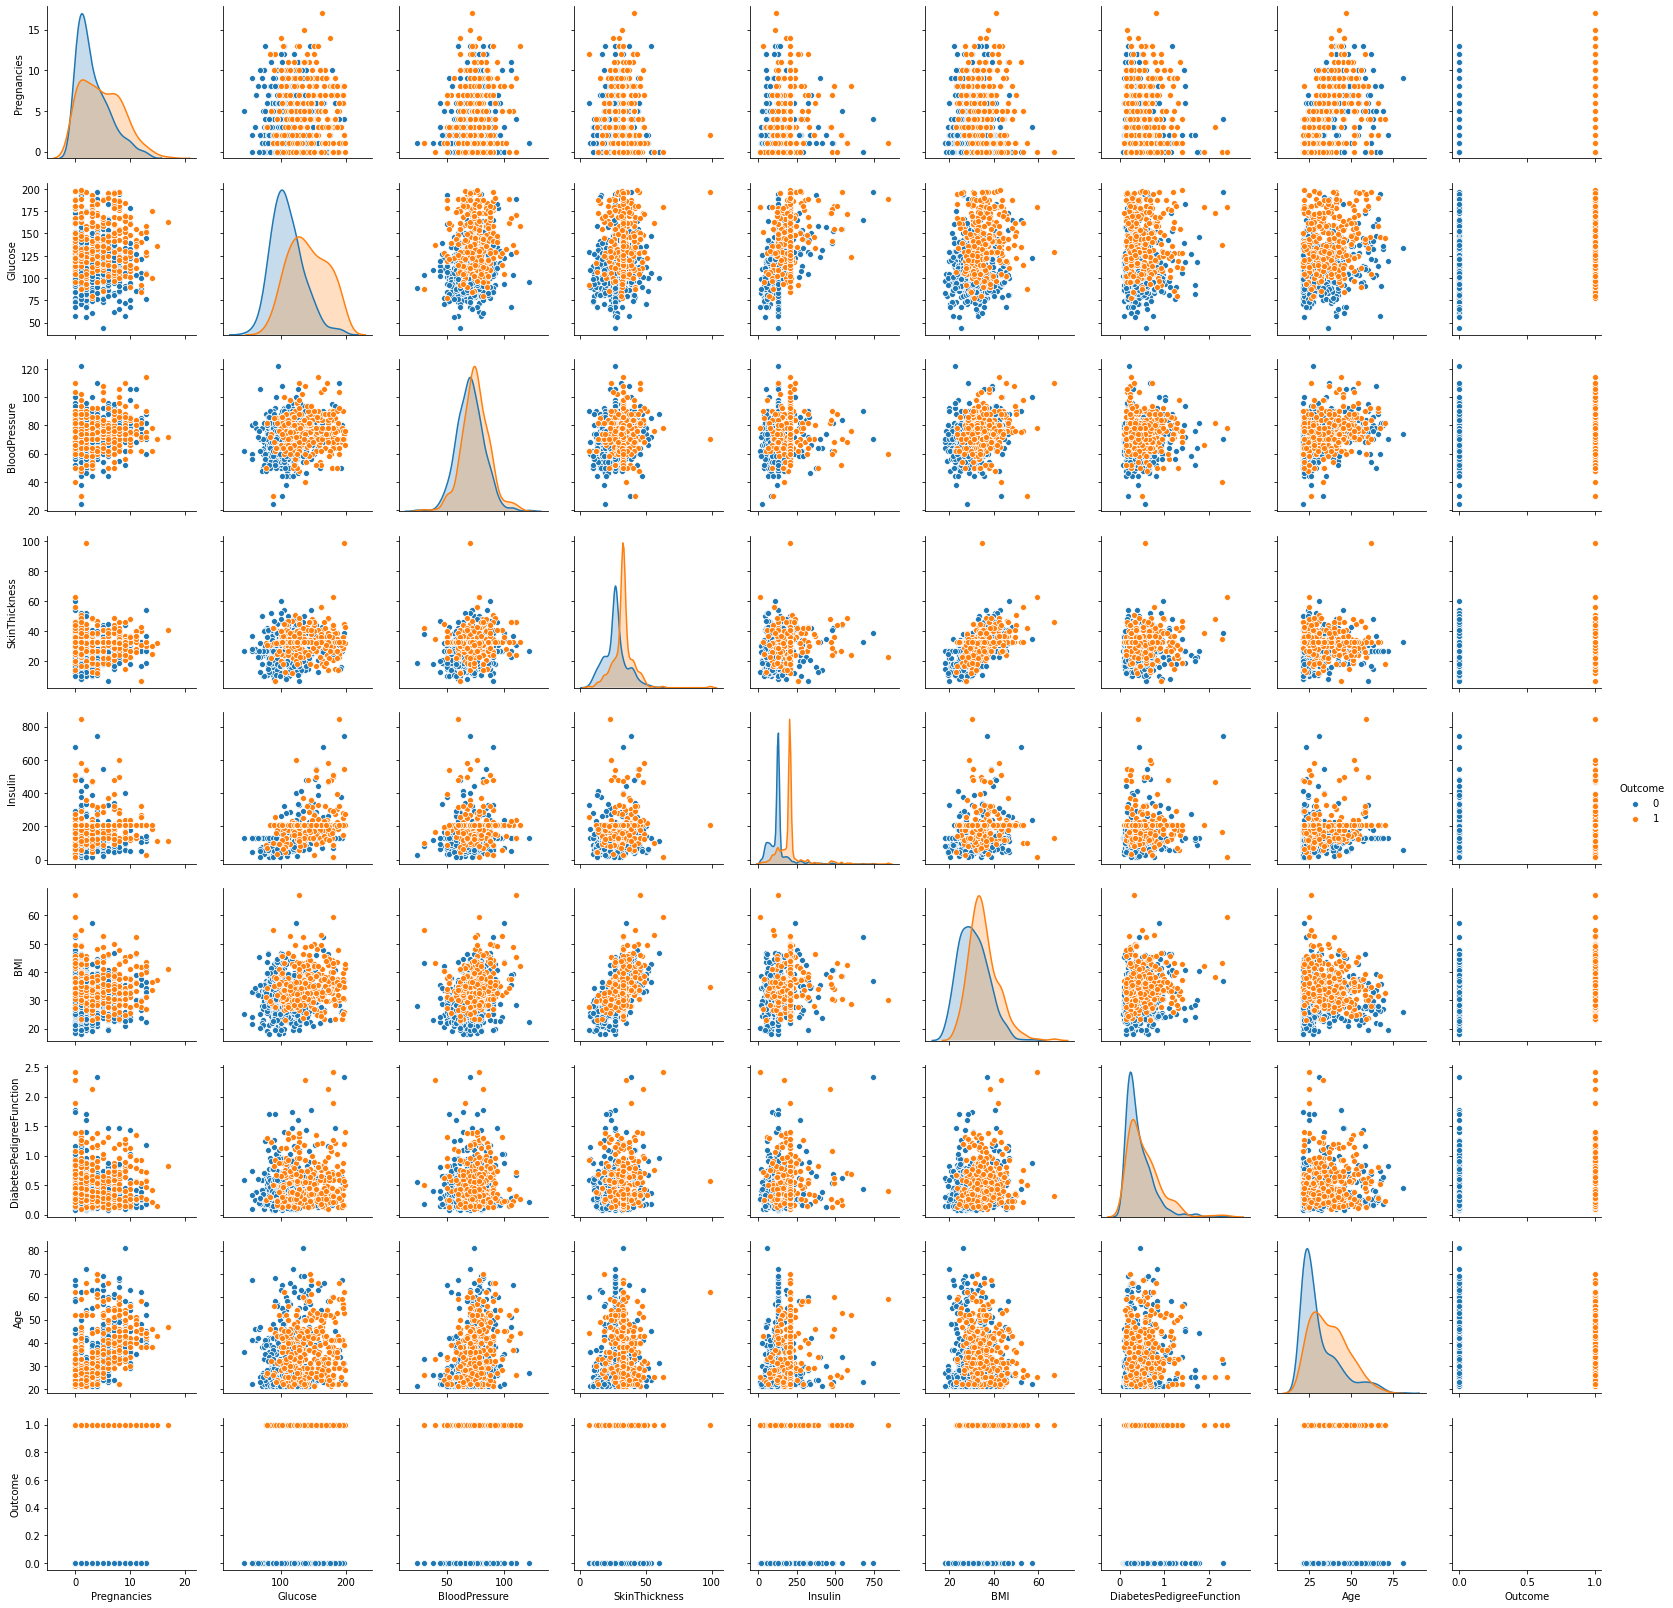

In [158]:
sns.pairplot(diabetes_data , hue='Outcome')
    
    


In [159]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = diabetes_data.Outcome
X = diabetes_data.drop('Outcome', axis= 1)


In [160]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 40)

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(576, 8)
(576,)
(192, 8)
(192,)


In [161]:
from sklearn.neighbors import KNeighborsClassifier

train_scores= []
test_scores = []

for i in range(1,12):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

max_train_score= max(train_scores)  
max_test_score = max(test_scores)
print('Max test score {}'.format(max_test_score))

Max test score 0.7760416666666666


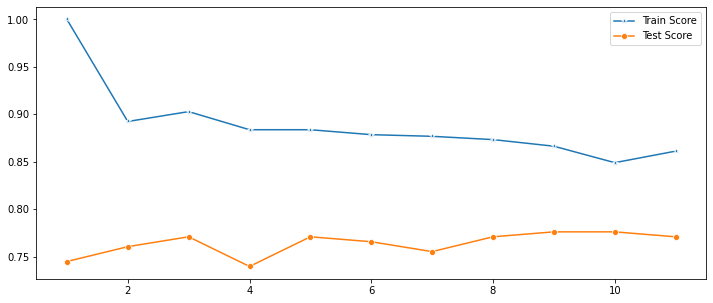

In [162]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,12),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,12),test_scores,marker='o',label='Test Score')

In [163]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,103,16,119
1,28,45,73
All,131,61,192


In [164]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.82       119
           1       0.74      0.62      0.67        73

    accuracy                           0.77       192
   macro avg       0.76      0.74      0.75       192
weighted avg       0.77      0.77      0.77       192



Score:0.84375


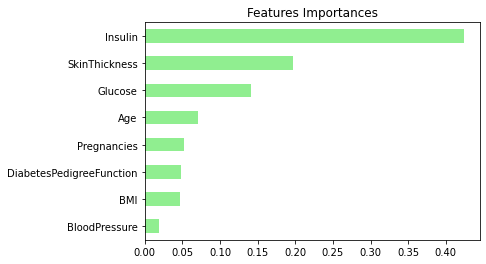

In [235]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200,min_samples_leaf=0.01,random_state=2)
rf.fit(X_train,y_train)

print("Score:" + str(rf.score(X_test,y_test)))


features = list(X.columns)
importances = pd.Series(data=rf.feature_importances_,index= features)
importances_sorted = importances.sort_values()
top_importance = importances_sorted[importances_sorted > 0]

# barplot of importances
top_importance.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.yticks(horizontalalignment='right',fontweight='light')


plt.show()

